## 1 The Intensity Diagram of three bands

In [1]:
# start by importing the necessities
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt

### 1.1 H alpha Intensity

In [2]:
Ha = fits.open('/Users/wanyan/Desktop/229Data/Ha.fits')
imHa = Ha[0].data

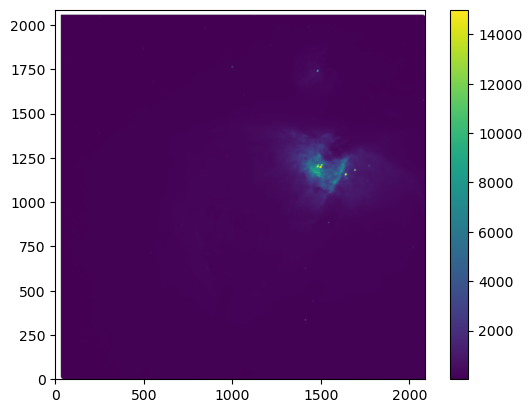

In [3]:
plt.imshow(imHa, origin='lower', vmin=25, vmax=15000)
plt.colorbar()

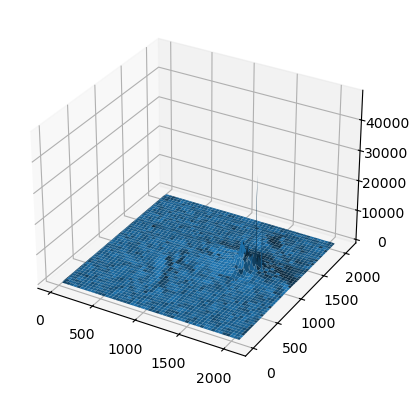

In [4]:
# 3D Visualization
xarray = np.vstack([np.arange(imHa.shape[1])]*imHa.shape[0])
yarray = np.tile(np.arange(imHa.shape[0])[:,np.newaxis], imHa.shape[1])

# Plot the surface to visualize the 'mountains'
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(xarray, yarray, imHa)#, vmin=Z.min() * 2, cmap=cm.Blues)

#### Background subtraction

Because M42 is an extended nebula that fills a large portion of the field, I will approximate the sky background by finding an "empty" portion of sky, and subtract.

In [5]:
sky = Ha[0].data[200:400, 1873:1942]
sky_med = np.median(sky)

print("Background Median: ", sky_med)

Background Median:  108.30672386528039


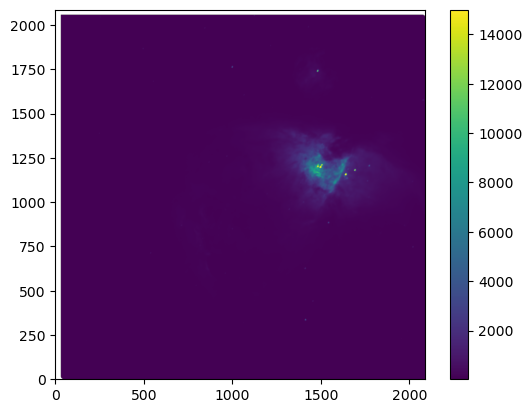

In [6]:
Ha_subtracted = imHa - sky_med

plt.imshow(Ha_subtracted, origin='lower', vmin=25, vmax=15000)
plt.colorbar()

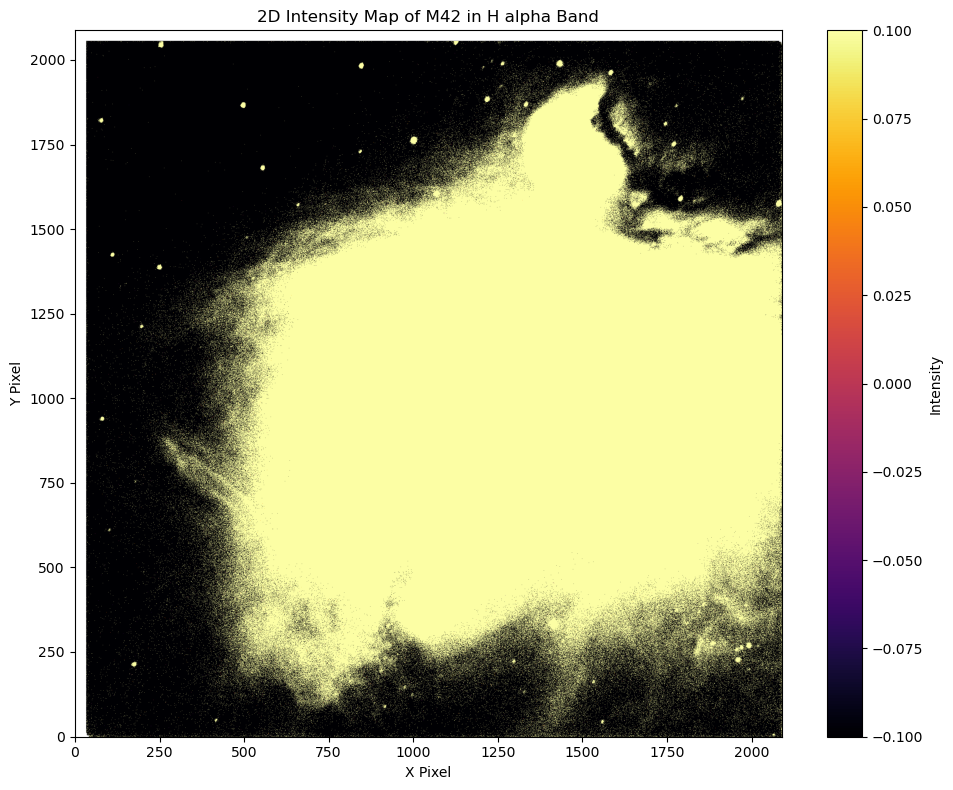

In [7]:
vmin = np.percentile(Ha_subtracted, 1)
vmax = np.percentile(Ha_subtracted, 99)

plt.figure(figsize=(10, 8))
plt.imshow(Ha_subtracted, origin='lower', cmap='inferno', vmin=vmin, vmax=vmax)
plt.colorbar(label='Intensity')
plt.title("2D Intensity Map of M42 in H alpha Band")
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.tight_layout()
plt.show()

### 1.2 S II Intensity

In [8]:
S2 = fits.open('/Users/wanyan/Desktop/229Data/S2.fits')
imS2 = S2[0].data

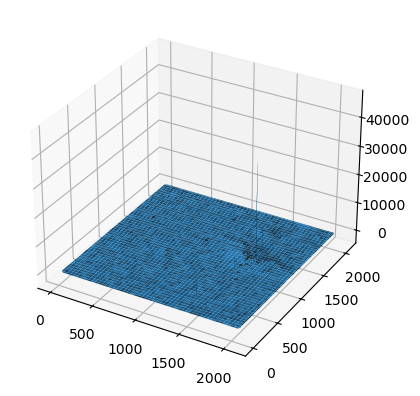

In [9]:
xarray = np.vstack([np.arange(imS2.shape[1])]*imS2.shape[0])
yarray = np.tile(np.arange(imS2.shape[0])[:,np.newaxis], imS2.shape[1])

# Plot the surface to visualize the 'mountains'
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(xarray, yarray, imS2)#, vmin=Z.min() * 2, cmap=cm.Blues)

#### Background subtraction

In [10]:
sky = S2[0].data[265:479, 1543:1684]
sky_med = np.median(sky)

print("Background Median: ", sky_med)

Background Median:  66.4144227283733


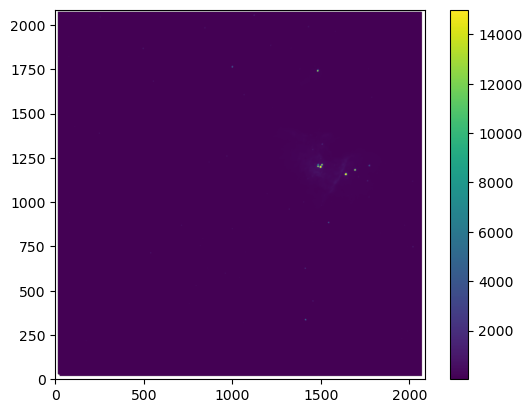

In [11]:
S2_subtracted = imS2 - sky_med

plt.imshow(S2_subtracted, origin='lower', vmin=25, vmax=15000)
plt.colorbar()

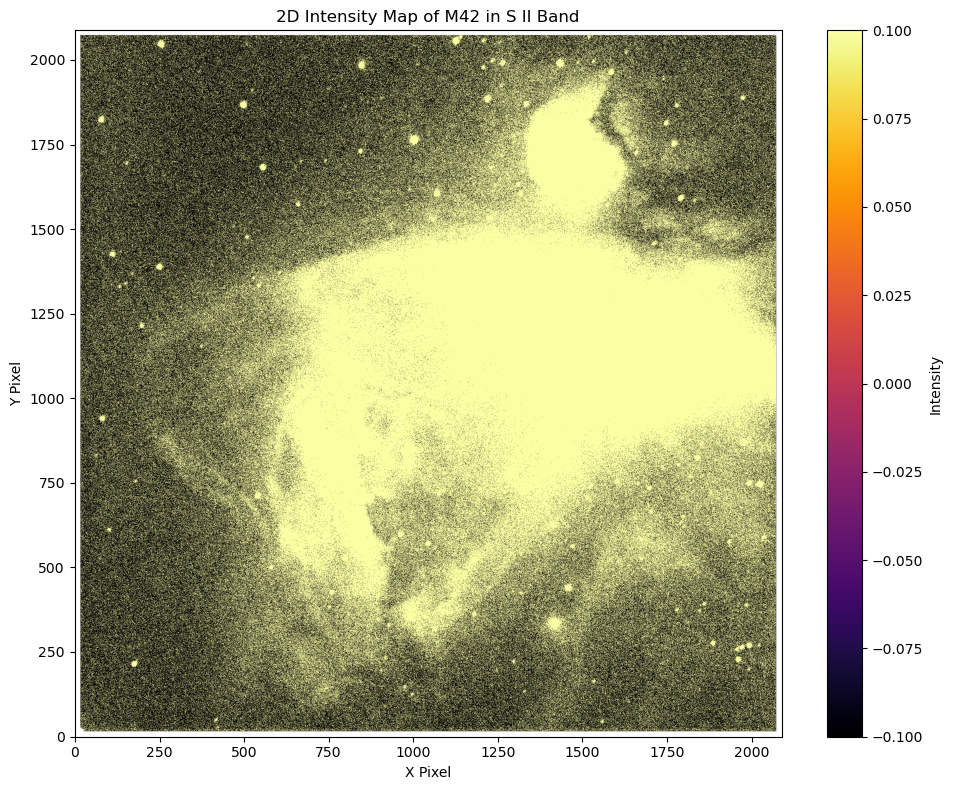

In [12]:
vmin = np.percentile(S2_subtracted, 1)
vmax = np.percentile(S2_subtracted, 99)

plt.figure(figsize=(10, 8))
plt.imshow(S2_subtracted, origin='lower', cmap='inferno', vmin=vmin, vmax=vmax)
plt.colorbar(label='Intensity')
plt.title("2D Intensity Map of M42 in S II Band")
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.tight_layout()
plt.show()

### 1.3 O III Intensity

In [13]:
O3 = fits.open('/Users/wanyan/Desktop/229Data/O3.fits')
imO3 = O3[0].data

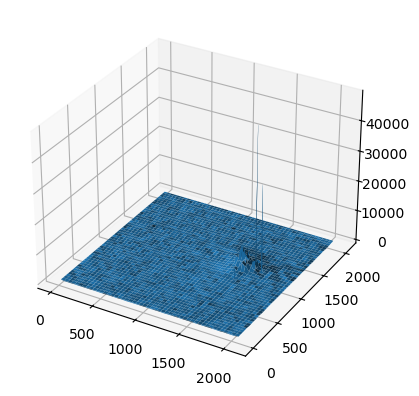

In [14]:
xarray = np.vstack([np.arange(imO3.shape[1])]*imO3.shape[0])
yarray = np.tile(np.arange(imO3.shape[0])[:,np.newaxis], imO3.shape[1])

# Plot the surface to visualize the 'mountains'
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(xarray, yarray, imO3)#, vmin=Z.min() * 2, cmap=cm.Blues)

#### Background subtraction

In [15]:
sky = O3[0].data[161:456, 1601:1768]
sky_med = np.median(sky)

print("Background Median: ", sky_med)

Background Median:  179.4834149979917


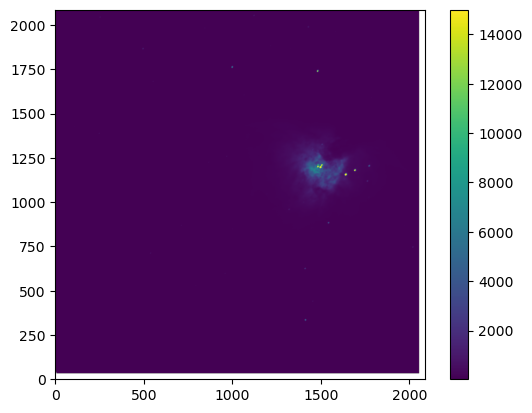

In [16]:
O3_subtracted = imO3 - sky_med

plt.imshow(O3_subtracted, origin='lower', vmin=25, vmax=15000)
plt.colorbar()

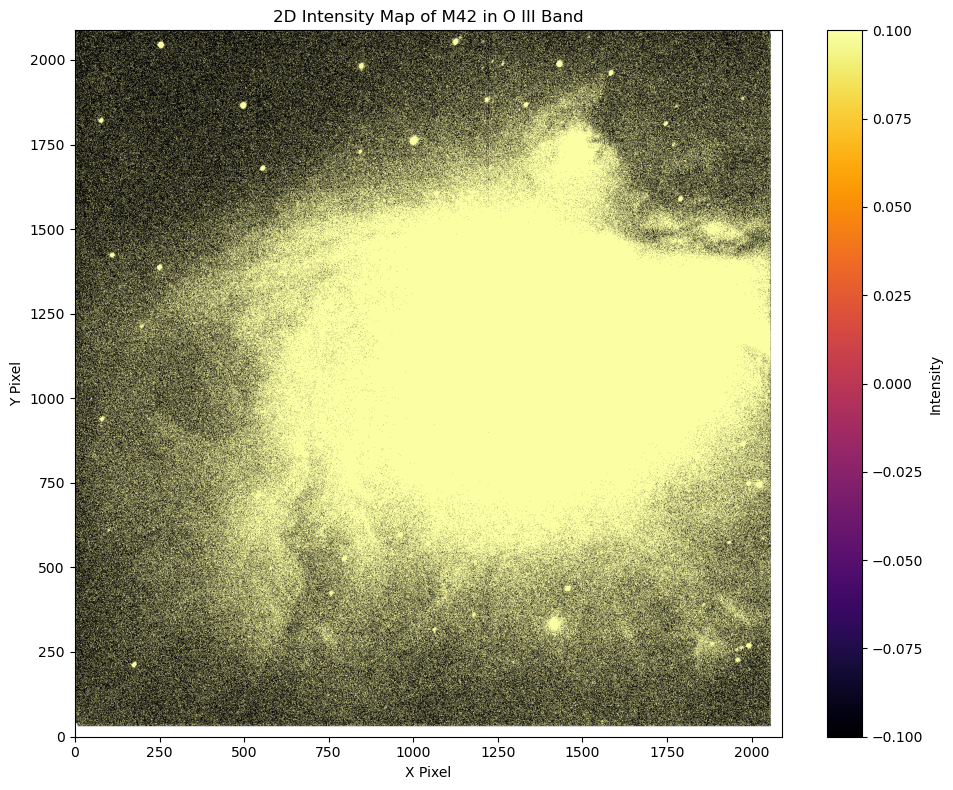

In [17]:
vmin = np.percentile(O3_subtracted, 1)
vmax = np.percentile(O3_subtracted, 99)

plt.figure(figsize=(10, 8))
plt.imshow(O3_subtracted, origin='lower', cmap='inferno', vmin=vmin, vmax=vmax)
plt.colorbar(label='Intensity')
plt.title("2D Intensity Map of M42 in O III Band")
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.tight_layout()
plt.show()

## 2 Intensity Ratio

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Your numpy arrays:
Ha = Ha_subtracted
S2 = S2_subtracted
O3 = O3_subtracted

# mask: pixels must be > 0 AND above 5th percentile of Ha
mask = (Ha > 0) & (S2 > 0) & (O3 > 0)

thresh = np.percentile(Ha[Ha > 0], 5)
mask &= (Ha > thresh)


In [19]:
ratio_O3_Ha = np.zeros_like(Ha, dtype=float)
ratio_S2_Ha = np.zeros_like(Ha, dtype=float)
ratio_O3_S2 = np.zeros_like(Ha, dtype=float)

ratio_O3_Ha[mask] = O3[mask] / Ha[mask]
ratio_S2_Ha[mask] = S2[mask] / Ha[mask]
ratio_O3_S2[mask] = O3[mask] / S2[mask]


#### O3 and H alpha

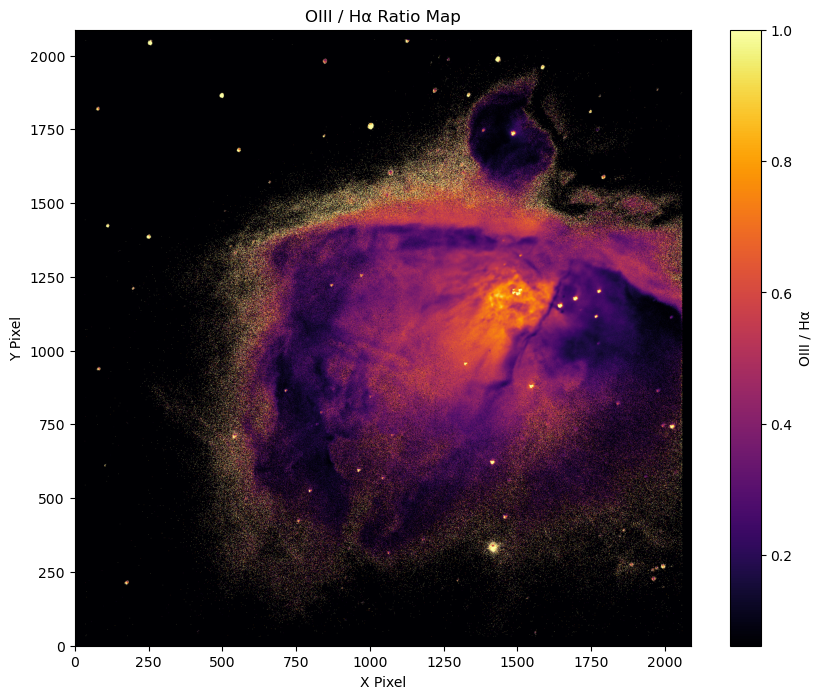

In [20]:
plt.figure(figsize=(10,8))
vmin, vmax = np.percentile(ratio_O3_Ha[mask], (5, 95))
plt.imshow(ratio_O3_Ha, origin='lower', cmap='inferno', vmin=vmin, vmax=vmax)
plt.colorbar(label='OIII / Hα')
plt.title("OIII / Hα Ratio Map")
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.show()


#### S II and H alpha

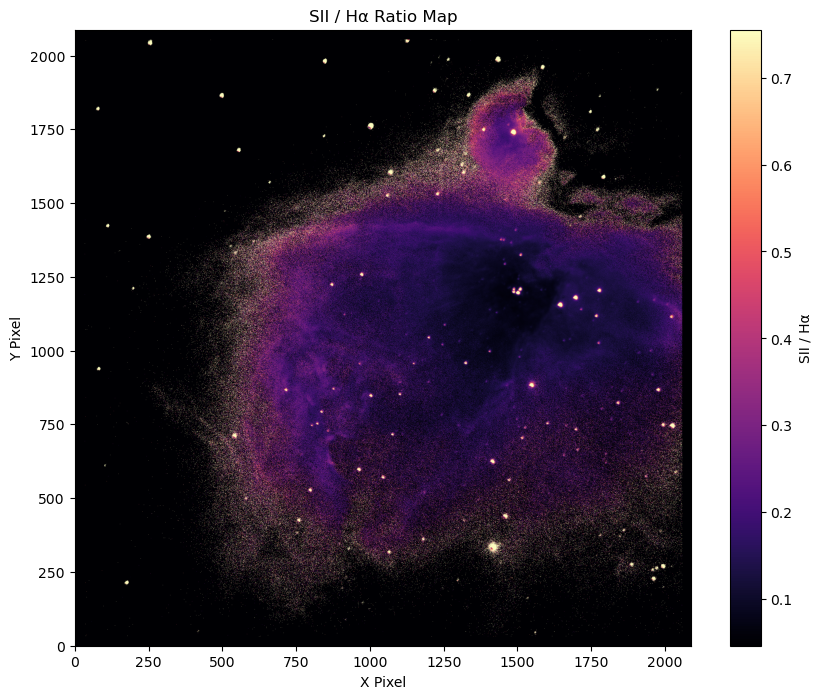

In [21]:
plt.figure(figsize=(10,8))
vmin, vmax = np.percentile(ratio_S2_Ha[mask], (5, 95))
plt.imshow(ratio_S2_Ha, origin='lower', cmap='magma', vmin=vmin, vmax=vmax)
plt.colorbar(label='SII / Hα')
plt.title("SII / Hα Ratio Map")
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.show()


#### OIII and S II

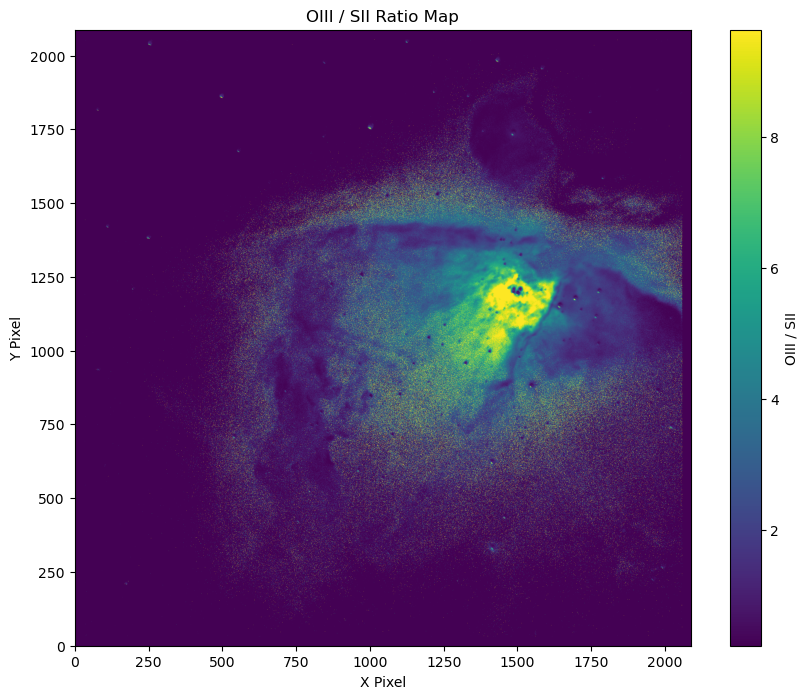

In [22]:
plt.figure(figsize=(10,8))
vmin, vmax = np.percentile(ratio_O3_S2[mask], (5, 95))
plt.imshow(ratio_O3_S2, origin='lower', cmap='viridis', vmin=vmin, vmax=vmax)
plt.colorbar(label='OIII / SII')
plt.title("OIII / SII Ratio Map")
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.show()


#### Conclusion

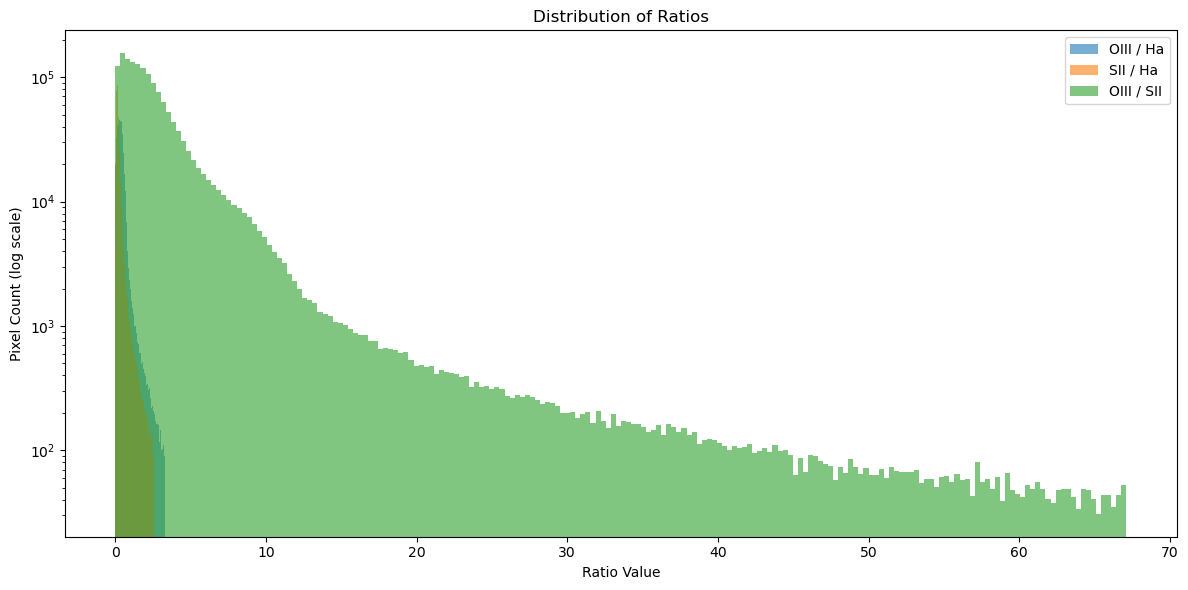

In [25]:
def clean_ratio(arr):
    r = arr.copy()
    r = r[np.isfinite(r)]      # remove NaN
    r = r[r > 0]               
    # Remove outliers
    upper = np.percentile(r, 99.5)
    r = r[r < upper]
    return r

o3ha_clean = clean_ratio(ratio_O3_Ha)
s2ha_clean = clean_ratio(ratio_S2_Ha)
o3s2_clean = clean_ratio(ratio_O3_S2)

# Histogram
plt.figure(figsize=(12,6))

plt.hist(o3ha_clean,  bins=200, alpha=0.6, label='OIII / Ha')
plt.hist(s2ha_clean,  bins=200, alpha=0.6, label='SII / Ha')
plt.hist(o3s2_clean,  bins=200, alpha=0.6, label='OIII / SII')

plt.yscale('log') 
plt.xlabel("Ratio Value")
plt.ylabel("Pixel Count (log scale)")
plt.title("Distribution of Ratios")
plt.legend()
plt.tight_layout()
plt.show()

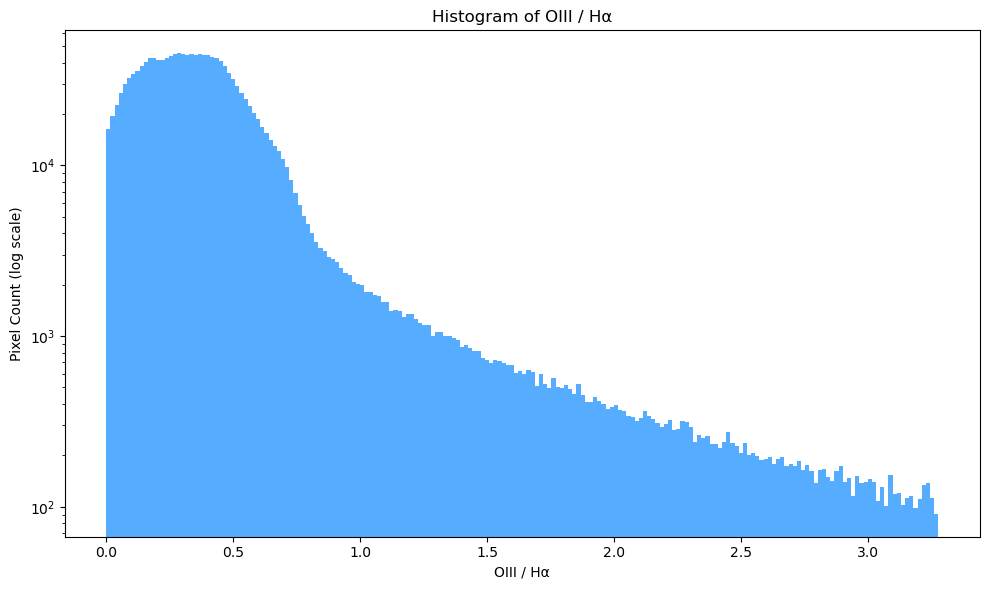

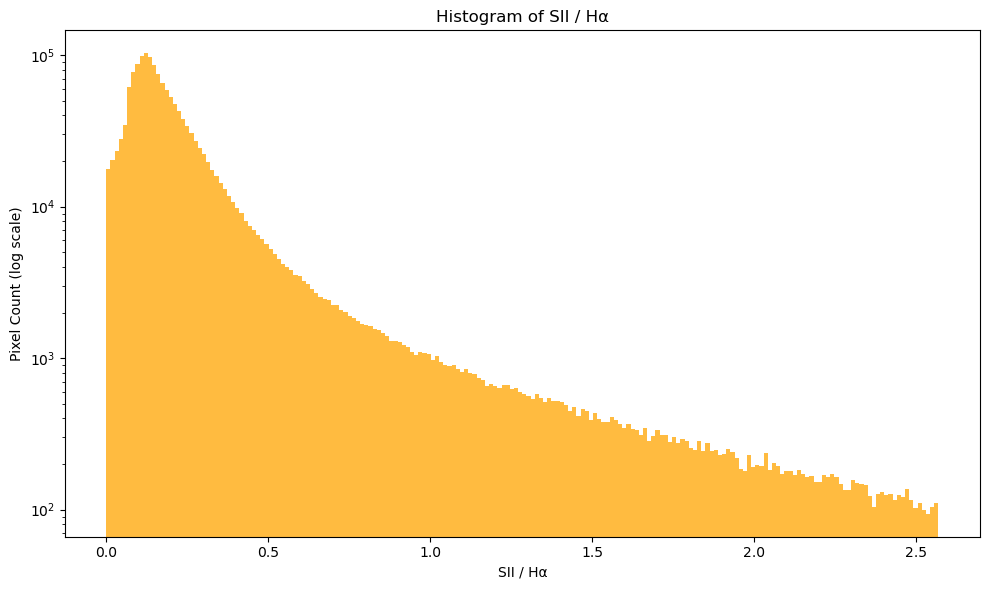

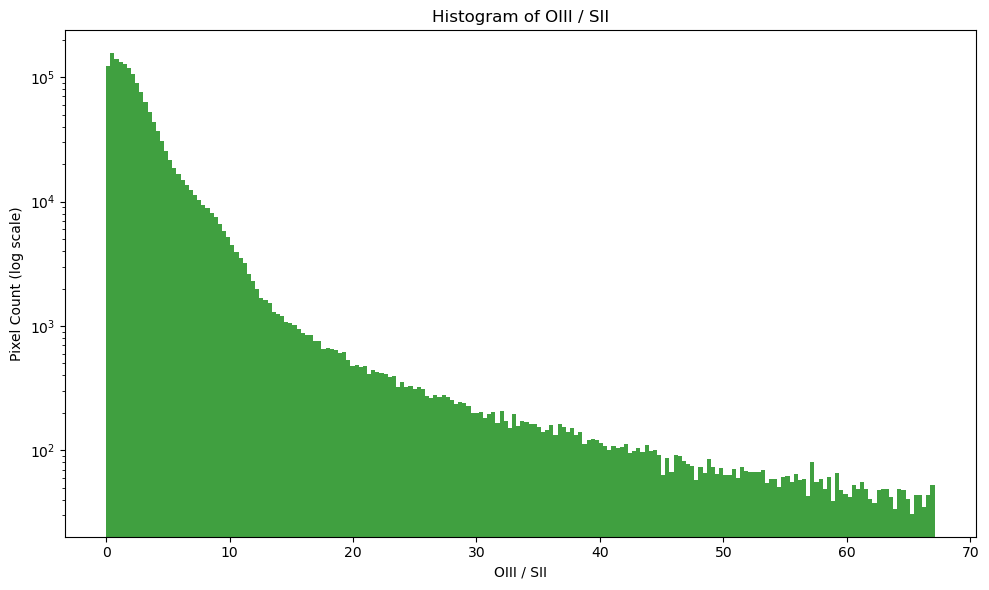

In [26]:
# 1. OIII / Hα
plt.figure(figsize=(10,6))
plt.hist(o3ha_clean, bins=200, alpha=0.75, color='dodgerblue')
plt.yscale('log')
plt.xlabel("OIII / Hα")
plt.ylabel("Pixel Count (log scale)")
plt.title("Histogram of OIII / Hα")
plt.tight_layout()
plt.show()


# 2. SII / Hα
plt.figure(figsize=(10,6))
plt.hist(s2ha_clean, bins=200, alpha=0.75, color='orange')
plt.yscale('log')
plt.xlabel("SII / Hα")
plt.ylabel("Pixel Count (log scale)")
plt.title("Histogram of SII / Hα")
plt.tight_layout()
plt.show()


# 3. OIII / SII
plt.figure(figsize=(10,6))
plt.hist(o3s2_clean, bins=200, alpha=0.75, color='green')
plt.yscale('log')
plt.xlabel("OIII / SII")
plt.ylabel("Pixel Count (log scale)")
plt.title("Histogram of OIII / SII")
plt.tight_layout()
plt.show()
